In [49]:
# Used imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve

In [50]:
# Read data
data = pd.read_csv('Sentiment140.tenPercent.sample.tweets.tsv', sep='\t')

In [51]:
# split into features and labels
features = data['tweet_text'].values
labels = data['sentiment_label'].values

In [52]:
# Split into train and test
feat_train, feat_test, label_train, label_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [53]:
# Vectorize the text
vectorizer = CountVectorizer()
vectorizer.fit(feat_train)
X_train = vectorizer.transform(feat_train)
X_test = vectorizer.transform(feat_test)

In [54]:
# Create first classifier.
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, label_train)

LogisticRegression(max_iter=1000)

In [55]:
# Save predictions
predictions = classifier.predict(X_test)

In [56]:
# Create second classifier
classifier2 = RandomForestClassifier(n_estimators=5, random_state=0)
classifier2.fit(X_train, label_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [57]:
# Save predictions
predictions2 = classifier2.predict(X_test)

In [58]:
# Print all the stats
print("Stats for LogisticRegression model:")
print(confusion_matrix(label_test,predictions))
print(classification_report(label_test,predictions))
print(accuracy_score(label_test, predictions))


print("\nStats for RandomForestClassifier model:")
print(confusion_matrix(label_test,predictions2))
print(classification_report(label_test,predictions2))
print(accuracy_score(label_test, predictions2))

Stats for LogisticRegression model:
[[12182  3687]
 [ 3413 12718]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     15869
           4       0.78      0.79      0.78     16131

    accuracy                           0.78     32000
   macro avg       0.78      0.78      0.78     32000
weighted avg       0.78      0.78      0.78     32000

0.778125

Stats for RandomForestClassifier model:
[[11341  4528]
 [ 4825 11306]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71     15869
           4       0.71      0.70      0.71     16131

    accuracy                           0.71     32000
   macro avg       0.71      0.71      0.71     32000
weighted avg       0.71      0.71      0.71     32000

0.70771875


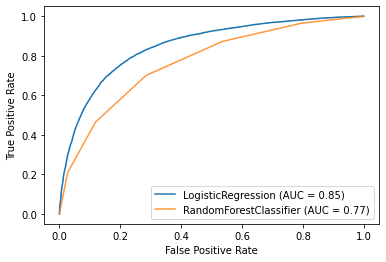

In [59]:
# ROC Curve of the two models.
disp = plot_roc_curve(classifier, X_test, label_test)
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier2, X_test, label_test, ax=ax, alpha=0.8)